 
### Write A data Science Blog post



In [816]:
#import libaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns


In [817]:
#Import data
data=pd.read_csv(r'C:/Users/Gal/Desktop/STUDYING/Data- engineering/Data Science/proj1 write a data science blog post/listings_ws.csv')
data_cal=pd.read_csv(r'C:/Users/Gal/Desktop/STUDYING/Data- engineering/Data Science/proj1 write a data science blog post/calendar.csv')
data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,2.016010e+13,04/01/2016,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,2.016010e+13,04/01/2016,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,2.016010e+13,04/01/2016,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,2.016010e+13,04/01/2016,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,2.016010e+13,04/01/2016,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [818]:
#clean price
for i in range(len(data)):
    data.loc[i,("price")]=data.loc[i,("price")][1:]
data["price"]=pd.to_numeric(data["price"], errors='coerce')

data_cal["price"]=data_cal["price"].fillna('10') # the 10 will be 0 in the next line
data_cal["price"]=data_cal["price"].apply(lambda x: x[1:]) # remove dollars
data_cal["price"]=pd.to_numeric(data_cal["price"], errors='coerce') # change string to float
data_cal["price"].head() 


0    85.0
1    85.0
2     0.0
3     0.0
4     0.0
Name: price, dtype: float64

In [819]:
# clean data_calender - add booked days and total amount of money
data_cal["booked"]=np.where(data_cal["price"]>0,1,0)
data_cal[['price',"booked"]]
data_cal=data_cal.rename(columns={'listing_id':'id','price':'total_price'})
data_cal_groupby=data_cal.groupby("id").sum()

In [820]:
#merge 2 tables 
data=pd.merge(data, data_cal_groupby, how="right", on=["id"])

In [823]:
#check cols type
categorical_cols=["host_response_time","host_neighbourhood","host_has_profile_pic","host_identity_verified","street"
            ,"neighbourhood","property_type","room_type","bed_type","amenities"]
numerical_cols=["host_response_rate","accommodates","bathrooms","bedrooms","beds","price","weekly_price","monthly_price","security_deposit"
        ,"cleaning_fee","guests_included","extra_people","number_of_reviews","review_scores_rating","review_scores_accuracy"
        ,"review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location"
        ,"review_scores_value","cancellation_policy"]

#drop the unrelated cols
data=data[["host_response_time","host_neighbourhood","host_has_profile_pic","host_identity_verified","street"
            ,"neighbourhood","property_type","room_type","bed_type","amenities","host_response_rate","accommodates","bathrooms","bedrooms","beds","price","weekly_price","monthly_price","security_deposit"
        ,"cleaning_fee","guests_included","extra_people","number_of_reviews","review_scores_rating","review_scores_accuracy"
        ,"review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location"
        ,"review_scores_value","cancellation_policy",'total_price','booked']]
## details on the data
print("The data has {} rows and {} cols".format(data.shape[0],data.shape[1]))

The data has 3818 rows and 33 cols


In [826]:
#drop nan row of price
data = data.dropna(subset=['price'], axis=0)

In [827]:
grpupby_data=data.groupby("neighbourhood").count()
list_of_common_neigh=list(grpupby_data[grpupby_data["host_neighbourhood"]>75].index)
data[data["neighbourhood"].isin(list_of_common_neigh)].groupby("neighbourhood").count()

,host_response_time,host_neighbourhood,host_has_profile_pic,host_identity_verified,street,property_type,room_type,bed_type,amenities,host_response_rate,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,total_price,booked
neighbourhood,,,,,,,,,,,,,,,,,,,,,
Ballard,191,213,213,213,213,213,213,213,213,191,...,183,183,183,183,183,183,183,213,213,213
Belltown,189,202,202,202,204,204,204,204,204,189,...,182,182,182,182,182,182,182,204,204,204
Capitol Hill,289,351,351,351,351,351,351,351,351,289,...,286,286,286,286,286,286,286,351,351,351
Central Business District,79,81,81,81,81,81,81,81,81,79,...,71,71,71,71,71,71,71,81,81,81
First Hill,95,105,105,105,105,105,105,105,105,95,...,88,88,88,88,88,88,88,105,105,105
Fremont,128,148,148,148,148,148,148,148,148,128,...,126,126,126,126,126,126,126,148,148,148
Greenwood,66,79,79,79,79,79,79,79,79,66,...,61,59,59,59,59,59,59,79,79,79
Lower Queen Anne,66,83,83,83,83,83,83,83,83,66,...,63,63,63,63,63,63,63,83,83,83
Minor,173,192,192,192,192,192,192,192,192,173,...,175,174,175,174,175,174,174,192,192,192


# Question 1

#### what is the msost profit neighbourhood?

* first, we calculate the mean booked date in  a single year of each neighbourhood
* second, calculate the mean price in a single year of each neighbourhood
* finally we calcuate the mean of the total price of  of each neighbourhood


Text(0.5, 1.0, 'Total Booked days in a year')

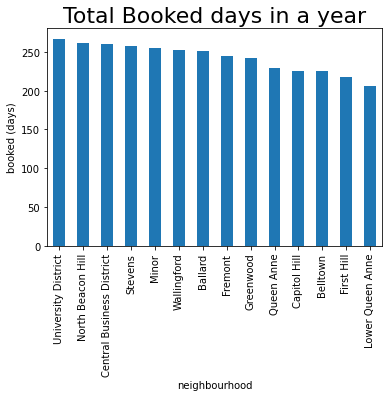

In [829]:
# How many days the mean of the neighbourhood were booked
plot=data[data["neighbourhood"].isin(list_of_common_neigh)].groupby("neighbourhood").mean()[["booked"]].sort_values(by=["booked"], ascending=False)
ax=plot.plot(kind='bar', legend=None);
ax.set_xlabel('neighbourhood');
ax.set_ylabel("booked (days)");
plt.title('Total Booked days in a year',size=22)

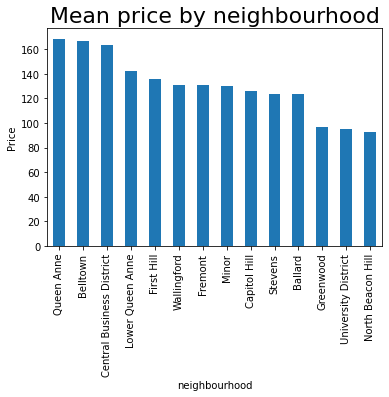

In [833]:
# The mean price of the apartment neighbourhood
plot=data[data["neighbourhood"].isin(list_of_common_neigh)].groupby("neighbourhood").mean()[["price"]].sort_values(by=["price"], ascending=False)
ax=plot.plot(kind='bar', legend=None);
ax.set_xlabel('neighbourhood');
ax.set_ylabel("Price");
plt.title("Mean price by neighbourhood", size=22);

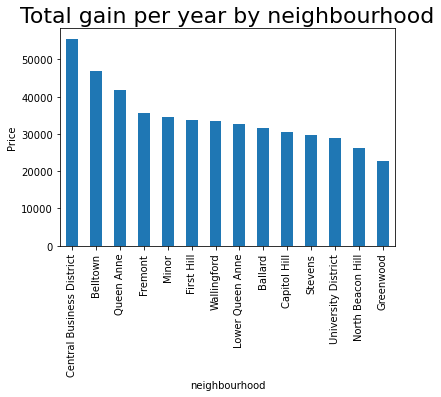

In [832]:
#what is the total amunt of money per neighbourhood - in other words , which neighbourhood is the most profit
plot=data[data["neighbourhood"].isin(list_of_common_neigh)].groupby("neighbourhood").mean()[["total_price"]].sort_values(by=["total_price"], ascending=False)
ax=plot.plot(kind='bar', legend=None);
ax.set_xlabel('neighbourhood');
ax.set_ylabel("Price");
plt.title("Total gain per year by neighbourhood", size=22);


# Discussion 1 - profit neighbourhood

• the most profit neighbourhood (calculation of day booked in a year and price) is Central Business District 

• the least profit neighbourhood is Greenwood 

# Question 2

#### Build Machine learning model to predict the price?

1. choose the desired columns - Done
2. clean the data- 
3. feature engineering
4. try several regression algorithn
5. tuning the best performance model
6. test and avaluate the model 

In [855]:
#create new data
data_ml=data

In [856]:
#Building a function that create colums of amenities

def amenities_spliter(data,amenity):
    '''
    get the data and the single amenity(str)
    return new data with new col of the amenity
    '''

    data.loc[data["amenities"].str.contains(amenity),amenity]=1
    data[i].fillna(0,inplace=True)
    return data

In [857]:
#Create list of amenities

data_ml["lem_amenities"]=data_ml["amenities"].str.len() # make new col of len of the amenities
a=data_ml.sort_values(by="lem_amenities",ascending=False)["amenities"].head(1) # choose the biggest list of amenities
list_of_amenities=a.to_list()[0].split(',') # preprocessing list
list_of_amenities[0]=list_of_amenities[0][1:]#fix the "TV"
list_of_amenities[-1]=list_of_amenities[-1][:-1] #fix the "Laptop Friendly Workspace"

for i in list_of_amenities:
    data_ml=amenities_spliter(data_ml,i)

C:\Users\Gal\AppData\Local\Temp/ipykernel_28140/2984340369.py:9: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  data.loc[data["amenities"].str.contains(amenity),amenity]=1


In [858]:
#removing unrelated col+ col with high nan value
data_ml=data_ml.drop(columns=['street',"weekly_price","monthly_price","security_deposit","total_price","booked","lem_amenities","amenities",'host_neighbourhood'])

In [859]:
data_ml.info()        

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3817 entries, 0 to 3817
Data columns (total 55 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_response_time            3295 non-null   object 
 1   host_has_profile_pic          3815 non-null   object 
 2   host_identity_verified        3815 non-null   object 
 3   neighbourhood                 3401 non-null   object 
 4   property_type                 3816 non-null   object 
 5   room_type                     3817 non-null   object 
 6   bed_type                      3817 non-null   object 
 7   host_response_rate            3295 non-null   object 
 8   accommodates                  3817 non-null   int64  
 9   bathrooms                     3801 non-null   float64
 10  bedrooms                      3811 non-null   float64
 11  beds                          3816 non-null   float64
 12  price                         3817 non-null   float64
 13  cle

In [860]:
#clean host_response_rate- convert to float
data_ml["host_response_rate"]=data_ml["host_response_rate"].apply(lambda x : str(x)[:-1] if x is not np.nan else np.nan) # skip nan 
data_ml["host_response_rate"]=data_ml["host_response_rate"].apply(lambda x : int(x) if x is not np.nan else np.nan)

In [861]:
##Feature engineering
#1.fill 0
data_ml["neighbourhood"]=data_ml["neighbourhood"].fillna(0)

In [862]:
#manipulate extra_people
data_ml["extra_people"]=data_ml["extra_people"].apply(lambda x : str(x)[1:])
data_ml["extra_people"]=data_ml["extra_people"].replace('an',0)
data_ml["extra_people"]=data_ml["extra_people"].apply(lambda x : float(x))

In [863]:
#manipulate cleaning fee
data_ml["cleaning_fee"]=data_ml["cleaning_fee"].apply(lambda x : str(x)[1:])
data_ml["cleaning_fee"]=data_ml["cleaning_fee"].replace('an',0)
data_ml["cleaning_fee"]=data_ml["cleaning_fee"].apply(lambda x : float(x))



In [864]:
data_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3817 entries, 0 to 3817
Data columns (total 55 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_response_time            3295 non-null   object 
 1   host_has_profile_pic          3815 non-null   object 
 2   host_identity_verified        3815 non-null   object 
 3   neighbourhood                 3817 non-null   object 
 4   property_type                 3816 non-null   object 
 5   room_type                     3817 non-null   object 
 6   bed_type                      3817 non-null   object 
 7   host_response_rate            3295 non-null   float64
 8   accommodates                  3817 non-null   int64  
 9   bathrooms                     3801 non-null   float64
 10  bedrooms                      3811 non-null   float64
 11  beds                          3816 non-null   float64
 12  price                         3817 non-null   float64
 13  cle

In [865]:
## fill mode - in my opinion , the other columns need the median imputer 
# fill the non-numerical- mode 
def fill_mode(data,col):
    '''
    get data and col
    return fill median nan data
    '''
    data[col]=data[col].fillna(data[col].mode()[0])
    return data

list_object=data_ml.select_dtypes(include=['object']).columns.to_list() # list of columns with object kind

#loop for all object cols 
for i in list_object:
    data_ml=fill_mode(data_ml,i)


In [866]:
## fill median - in my opinion , the other columns need the median imputer 
# fill the numerical- median 
def fill_median(data,col):
    '''
    get data and col
    return fill median nan data
    '''
    data[col]=data[col].fillna(data[col].median())
    return data

list_non_object=data_ml.select_dtypes(exclude=['object']).columns.to_list() # list of columns with object kind

#loop for all object cols 
for i in list_non_object:
    data_ml=fill_median(data_ml,i)

In [867]:
list_objects=data_ml.select_dtypes('object').columns.tolist() # list of objects

#dummy for the non-nomerical and categoycal 
data_ml_clean= pd.get_dummies(data_ml,columns= list_objects,prefix=None,prefix_sep='_',
    dummy_na=False,sparse=False,drop_first=False,dtype=None)

In [868]:
#check if there's null
print("there's ",data_ml_clean.isnull().sum().sum(),"null value")

there's  0 null value


# PCA - Principal Components Analysis 

In the next lines I alaysis the features in order to find correlation 

In [871]:
# Apply feature scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_ml_norm=pd.DataFrame(scaler.fit_transform(data_ml_clean), columns = data_ml_clean.columns)

<AxesSubplot:>

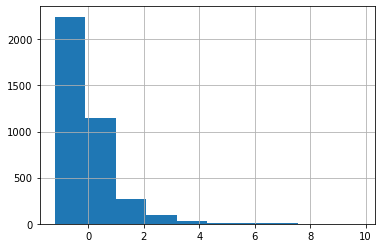

In [872]:
data_ml_norm["price"].hist()

In [873]:
#Perform Dimensionality Reduction
"""
we do it becouse we have a huge data set - more than 100 cols
I want to make the ML model more efficeint , so principal components remove noise by reducing a
large number of features to just a couple of principal components.
"""
from sklearn.decomposition import PCA
pca=PCA(n_components=100)
pca.fit(data_ml_norm)

PCA(n_components=100)

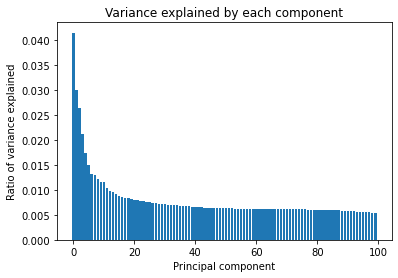

In [874]:
# Investigate the variance accounted for by each principal component.
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.title("Variance explained by each component")
plt.xlabel("Principal component")
plt.ylabel("Ratio of variance explained")
plt.show()

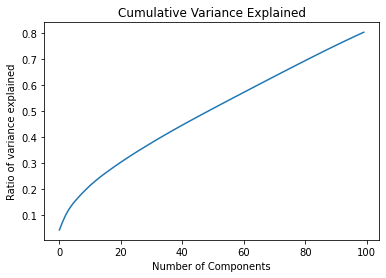

In [875]:
plt.plot(range(len(pca.explained_variance_ratio_)),np.cumsum(pca.explained_variance_ratio_), '-')
plt.title("Cumulative Variance Explained")
plt.xlabel("Number of Components")
plt.ylabel("Ratio of variance explained")
plt.show()

### Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first
few components to see if they can be interpreted.


In [878]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.
def pca_weights(pca, i):
    df = pd.DataFrame(pca.components_, columns=list(data_ml_norm.columns))
    weights = df.iloc[i].sort_values(ascending=False)
    return weights

In [882]:
pca_weight_0 = pca_weights(pca, 0)
print (pca_weight_0)

accommodates                    0.294121
beds                            0.266025
cleaning_fee                    0.263322
price                           0.246273
bedrooms                        0.240995
                                  ...   
"Pets live on this property"   -0.055153
bed_type_Futon                 -0.058057
room_type_Shared room          -0.066388
cancellation_policy_flexible   -0.134006
room_type_Private room         -0.200431
Name: 0, Length: 164, dtype: float64


In [883]:
pca_weight_1 = pca_weights(pca,2)
print (pca_weight_1)

property_type_Apartment      0.309478
"Elevator in Building"       0.272199
neighbourhood_Belltown       0.160764
room_type_Entire home/apt    0.134369
"Wheelchair Accessible"      0.133196
                               ...   
review_scores_accuracy      -0.214978
review_scores_checkin       -0.219776
review_scores_value         -0.246322
review_scores_rating        -0.252522
property_type_House         -0.295650
Name: 2, Length: 164, dtype: float64


In [884]:
pca_weight_2 = pca_weights(pca,3)
print (pca_weight_2)

room_type_Private room       0.199058
"Wireless Internet"          0.197285
Internet                     0.195478
property_type_House          0.186658
"First Aid Kit"              0.180288
                               ...   
review_scores_cleanliness   -0.215020
review_scores_accuracy      -0.216075
review_scores_value         -0.217812
review_scores_rating        -0.229243
review_scores_location      -0.242990
Name: 3, Length: 164, dtype: float64


# Discussion 2 : Interpret Principal Components

From the first principal component, it can be seen that

1. low price accosiates with flexible and moderate cancellation policy  , while high price accosiates with strict cancellation policy
2. apartment with elevtor has amentiy of  "Wheelchair Accessible"
3. Private room accosiates with interent and wireless internet

In [885]:
# for the machine learning model Im using the feature of data_ml_norm - feature after dummies manipulation
#normalization
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler() # default=(0, 1)
data_ml_clean_minmax_transform=pd.DataFrame(data =data_ml_clean)
col=data_ml_clean_minmax_transform.columns
data_ml_clean_minmax_transform[col] =  scaler.fit_transform(data_ml_clean[col])
data_ml_clean_minmax_transform


,host_response_rate,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,guests_included,extra_people,number_of_reviews,...,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,0.855422,0.200000,0.125,0.285714,0.071429,0.102145,0.250000,0.133333,0.033333,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.000000,0.066667,0.125,0.142857,0.000000,0.063330,0.100000,0.066667,0.000000,0.073840,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.000000,0.066667,0.125,0.142857,0.000000,0.028601,0.083333,0.066667,0.016667,0.626582,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.879518,0.066667,0.125,0.142857,0.000000,0.071502,0.133333,0.133333,0.033333,0.109705,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.000000,0.066667,0.125,0.142857,0.000000,0.066394,0.000000,0.066667,0.000000,0.084388,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,1.000000,0.066667,0.125,0.142857,0.000000,0.020429,0.000000,0.066667,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3814,1.000000,0.066667,0.125,0.142857,0.000000,0.102145,0.000000,0.066667,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3815,1.000000,0.066667,0.125,0.000000,0.000000,0.040858,0.000000,0.066667,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3816,1.000000,0.266667,0.250,0.285714,0.071429,0.203269,0.000000,0.066667,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [886]:
#Shuffle and Split Data
from sklearn.model_selection import train_test_split
price=data_ml_clean_minmax_transform["price"]
features_final=data_ml_clean_minmax_transform.drop(columns="price")
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    price, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 3053 samples.
Testing set has 764 samples.


# ML Model

### I will examine 5 Regression Algorithms
1. Linear Regression

2. Decision Tree

3. Support Vector Regression

4. Lasso Regression

5. Random Forest

### Then I'll Tune the best performance model ( random_forest regressor)

In [887]:

result={'linear_regression':{},'desicion_tree':{},'svr':{},'lasso':{},'random_forest':{}}

In [888]:
result

{'linear_regression': {},
 'desicion_tree': {},
 'svr': {},
 'lasso': {},
 'random_forest': {}}

In [889]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#linear regresiion

lr=LinearRegression().fit(X_train,y_train)
y_pred = lr.predict(X_test)
result["linear_regression"]["mae"]=mean_absolute_error(y_test,y_pred)
result["linear_regression"]["mse"]=mean_squared_error(y_test,y_pred)
result["linear_regression"]["r2"]=r2_score(y_test,y_pred)

In [890]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

#descion tree
d_tree=DecisionTreeRegressor(random_state=10).fit(X_train,y_train)
y_pred = d_tree.predict(X_test)
result["desicion_tree"]["mae"]=mean_absolute_error(y_test,y_pred)
result["desicion_tree"]["mse"]=mean_squared_error(y_test,y_pred)
result["desicion_tree"]["r2"]=r2_score(y_test,y_pred)

#SVR

svr=SVR().fit(X_train,y_train)
y_pred = svr.predict(X_test)
result["svr"]["mae"]=mean_absolute_error(y_test,y_pred)
result["svr"]["mse"]=mean_squared_error(y_test,y_pred)
result["svr"]["r2"]=r2_score(y_test,y_pred)

#lasso
lasso=linear_model.Lasso(alpha=10.1).fit(X_train,y_train)
y_pred = lasso.predict(X_test)
result["lasso"]["mae"]=mean_absolute_error(y_test,y_pred)
result["lasso"]["mse"]=mean_squared_error(y_test,y_pred)
result["lasso"]["r2"]=r2_score(y_test,y_pred)

#random forest

r_forest=RandomForestRegressor().fit(X_train,y_train)
y_pred = r_forest.predict(X_test)
result["random_forest"]["mae"]=mean_absolute_error(y_test,y_pred)
result["random_forest"]["mse"]=mean_squared_error(y_test,y_pred)
result["random_forest"]["r2"]=r2_score(y_test,y_pred)

In [891]:
result

{'linear_regression': {'mae': 0.03778820106081974,
  'mse': 0.0035819871164006873,
  'r2': 0.5856134650110401},
 'desicion_tree': {'mae': 0.046132392814550595,
  'mse': 0.005566053928404271,
  'r2': 0.35608428338771125},
 'svr': {'mae': 0.0504391789710306,
  'mse': 0.004613220179773504,
  'r2': 0.46631401417256035},
 'lasso': {'mae': 0.06112298404335025,
  'mse': 0.008669080787240034,
  'r2': -0.0028931518250374655},
 'random_forest': {'mae': 0.03404819611237636,
  'mse': 0.003222446456840321,
  'r2': 0.6272073633868038}}

In [892]:
## random_forest have the best performance
#tunning
#ref- https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [893]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:   19.3s remaining:   16.9s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.4min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [759]:
rf_random.best_params_ #check the best param

{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

In [894]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


Model Performance
Average Error: 0.0378 degrees.
Accuracy = 59.98%.
Model Performance
Average Error: 0.0347 degrees.
Accuracy = 60.06%.
Improvement of 0.13%.


In [897]:
# model ealuation
y_predict=best_random.predict(X_test)
print("R2 is: ", np.round(r2_score(y_test,y_predict),2))
print("Mean absolute error is: ", np.round(mean_absolute_error(y_test,y_pred),3))
print("Mean squared error is: ", np.round(mean_squared_error(y_test,y_pred),3))



R2 is:  0.62
Mean absolute error is:  0.034
Mean squared error is:  0.003


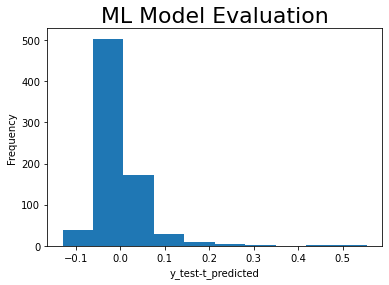

In [898]:
plt.hist(y_test-y_predict);
plt.xlabel('y_test-t_predicted');
plt.ylabel('Frequency');
plt.title('ML Model Evaluation',size=22);


### Feature Importance Analysis

An important task when performing supervised learning on a dataset like the data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict the price

In [899]:
importance=best_random.feature_importances_
d={"col":features_final.columns,"score":importance}
data=pd.DataFrame(data=d)
data.sort_values(by="score",ascending=False).head(10)

,col,score
3,bedrooms,0.114803
1,accommodates,0.103383
5,cleaning_fee,0.099722
2,bathrooms,0.089118
4,beds,0.077527
152,room_type_Entire home/apt,0.047871
6,guests_included,0.043698
153,room_type_Private room,0.031892
8,number_of_reviews,0.023647
7,extra_people,0.023627


# Discussion 3 : ML model
### model evaluation

the model has R2 of  0.62 and Mean absolute error of 0.34
if we examine the plot "ML Model Evaluation" we can see that the most of the reuslt ( y_predict-y_hat) are between -0.1 to 0.1
and its defentily low error 

### Feature Importance
we can examine that the  most crucial parameters for predict the price are:
    •bedrooms
    
    •accomodates
    
    •cleaning fee
    
    •bathroom
    
    •beds
    
    •guests_included
    
    •room type
  